## Подготовка данных

Загрузка библиотек:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
import random
import numpy as np

Загрузка файла:

In [3]:
churn = pd.read_csv('/datasets/Churn.csv')

In [4]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Получили полную информацию о датасете, теперь изучим все подробнее.

Мы получили на вход данные, в которых содержится 10000 строк. У всех столбцов, кроме одного, с содержанием все в порядке. Рассмотрим интересующий нас столбец **Tenure**. В нем содержится информация о количестве лет, проведенных клиентом в нашем банке. В нем есть 909 строк с пропусками (~10%). Рискну предположить, что это вновь прибывшие клиенты, данные которых еще не успели внести, поэтому заменим пропуски на 0, а также заменим тип на int

In [8]:
churn['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

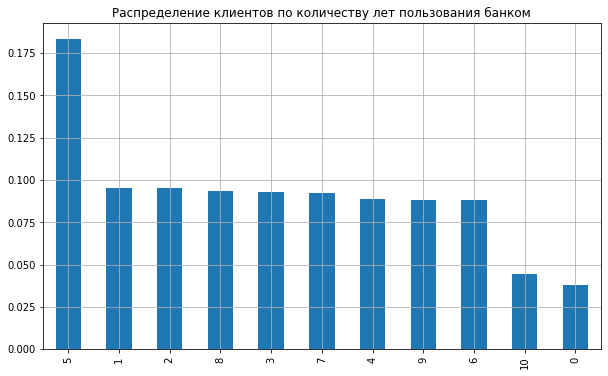

In [9]:
churn['Tenure'] = churn['Tenure'].fillna(random.randrange(1, 11))
churn['Tenure'] = churn['Tenure'].astype('int')
churn['Tenure'].value_counts(normalize = True).plot(kind='bar', grid=True,figsize=(10,6), title='Распределение клиентов по количеству лет пользования банком');

С учетом замены, количество клиентов с нулевым стажем не сильно выделяется на фоне остальных, поэтому данные можно считать обработанными.

In [10]:
churn['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

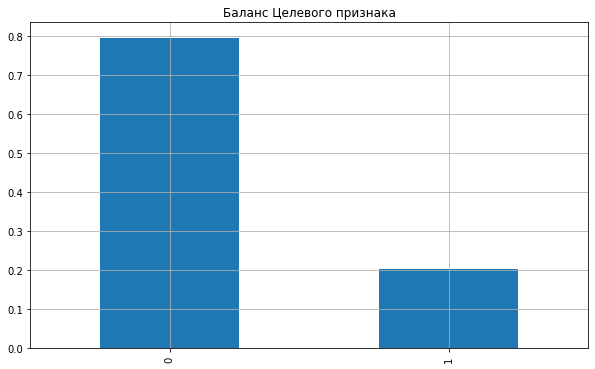

In [11]:
churn['Exited'].value_counts(normalize = True).plot(kind='bar', grid=True,figsize=(10,6), title='Баланс Целевого признака');

Проверка на дубликаты

In [12]:
churn.duplicated().sum()

0

In [13]:
churn.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Можем считать предобработку данных готовой, теперь подготовим их для дальнейшей работы с моделями.

Удалим столбцы, которые никак не помогут при создании моделей. RowNumber повторяет индексы таблицы, CustomerId может только запутать модель, ведь по сути это тоже индекс, Surname - также показывает только его "номер в социальном обществе".

In [14]:
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Используем прямое кодированием, избегая дамми-ловушки

In [15]:
churn_ohe = pd.get_dummies(churn, drop_first = True)
churn_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


Разобьем наш датасет на три выборки:

In [16]:
churn_train, temp = train_test_split(churn_ohe, test_size = 0.4, random_state = 12345)
churn_valid, churn_test = train_test_split(temp, test_size = 0.5, random_state = 12345)

Обучающая выборка (60%):

In [17]:
features_train = churn_train.drop(['Exited'], axis=1)
target_train = churn_train['Exited']
print("Размер Обучающей выборки:", features_train.shape, target_train.shape, end = '   ')

Размер Обучающей выборки: (6000, 11) (6000,)   

Валидационная выборка (20%):

In [18]:
features_valid = churn_valid.drop(['Exited'], axis=1)
target_valid = churn_valid['Exited']
print("Размер Валидационной выборки:", features_valid.shape, target_valid.shape, end = '   ')

Размер Валидационной выборки: (2000, 11) (2000,)   

Тестовая выборка (20%):

In [19]:
features_test = churn_test.drop(['Exited'], axis=1)
target_test = churn_test['Exited']
print("Размер Тестовой выборки:", features_test.shape, target_test.shape, end = '   ')

Размер Тестовой выборки: (2000, 11) (2000,)   

(Обучающая + Валидационная) (80%):

In [20]:
churn_temp = pd.concat([churn_valid, churn_train], ignore_index=True)

In [21]:
features_temp = churn_temp.drop(['Exited'], axis=1)
target_temp = churn_temp['Exited']
print("Размер Обучающей + Валидационной выборки:", features_temp.shape, target_temp.shape, end = '   ')

Размер Обучающей + Валидационной выборки: (8000, 11) (8000,)   

Рассмотрим нашу таблицу для нахождения количественных признаков:

In [22]:
churn_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [23]:
numeric = ['CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

Теперь масштабируем численные признаки для будущей Логистичекой регрессии

In [24]:
scaler = StandardScaler().fit(features_train[numeric])

In [25]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_temp[numeric] = scaler.transform(features_temp[numeric])

In [26]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


Наши данные разбиты на выборки, значения признаков приведены к одному масштабу, но прежде чем приступить к исследованию задачи, проверим датасет на корреляцию между столбцами.

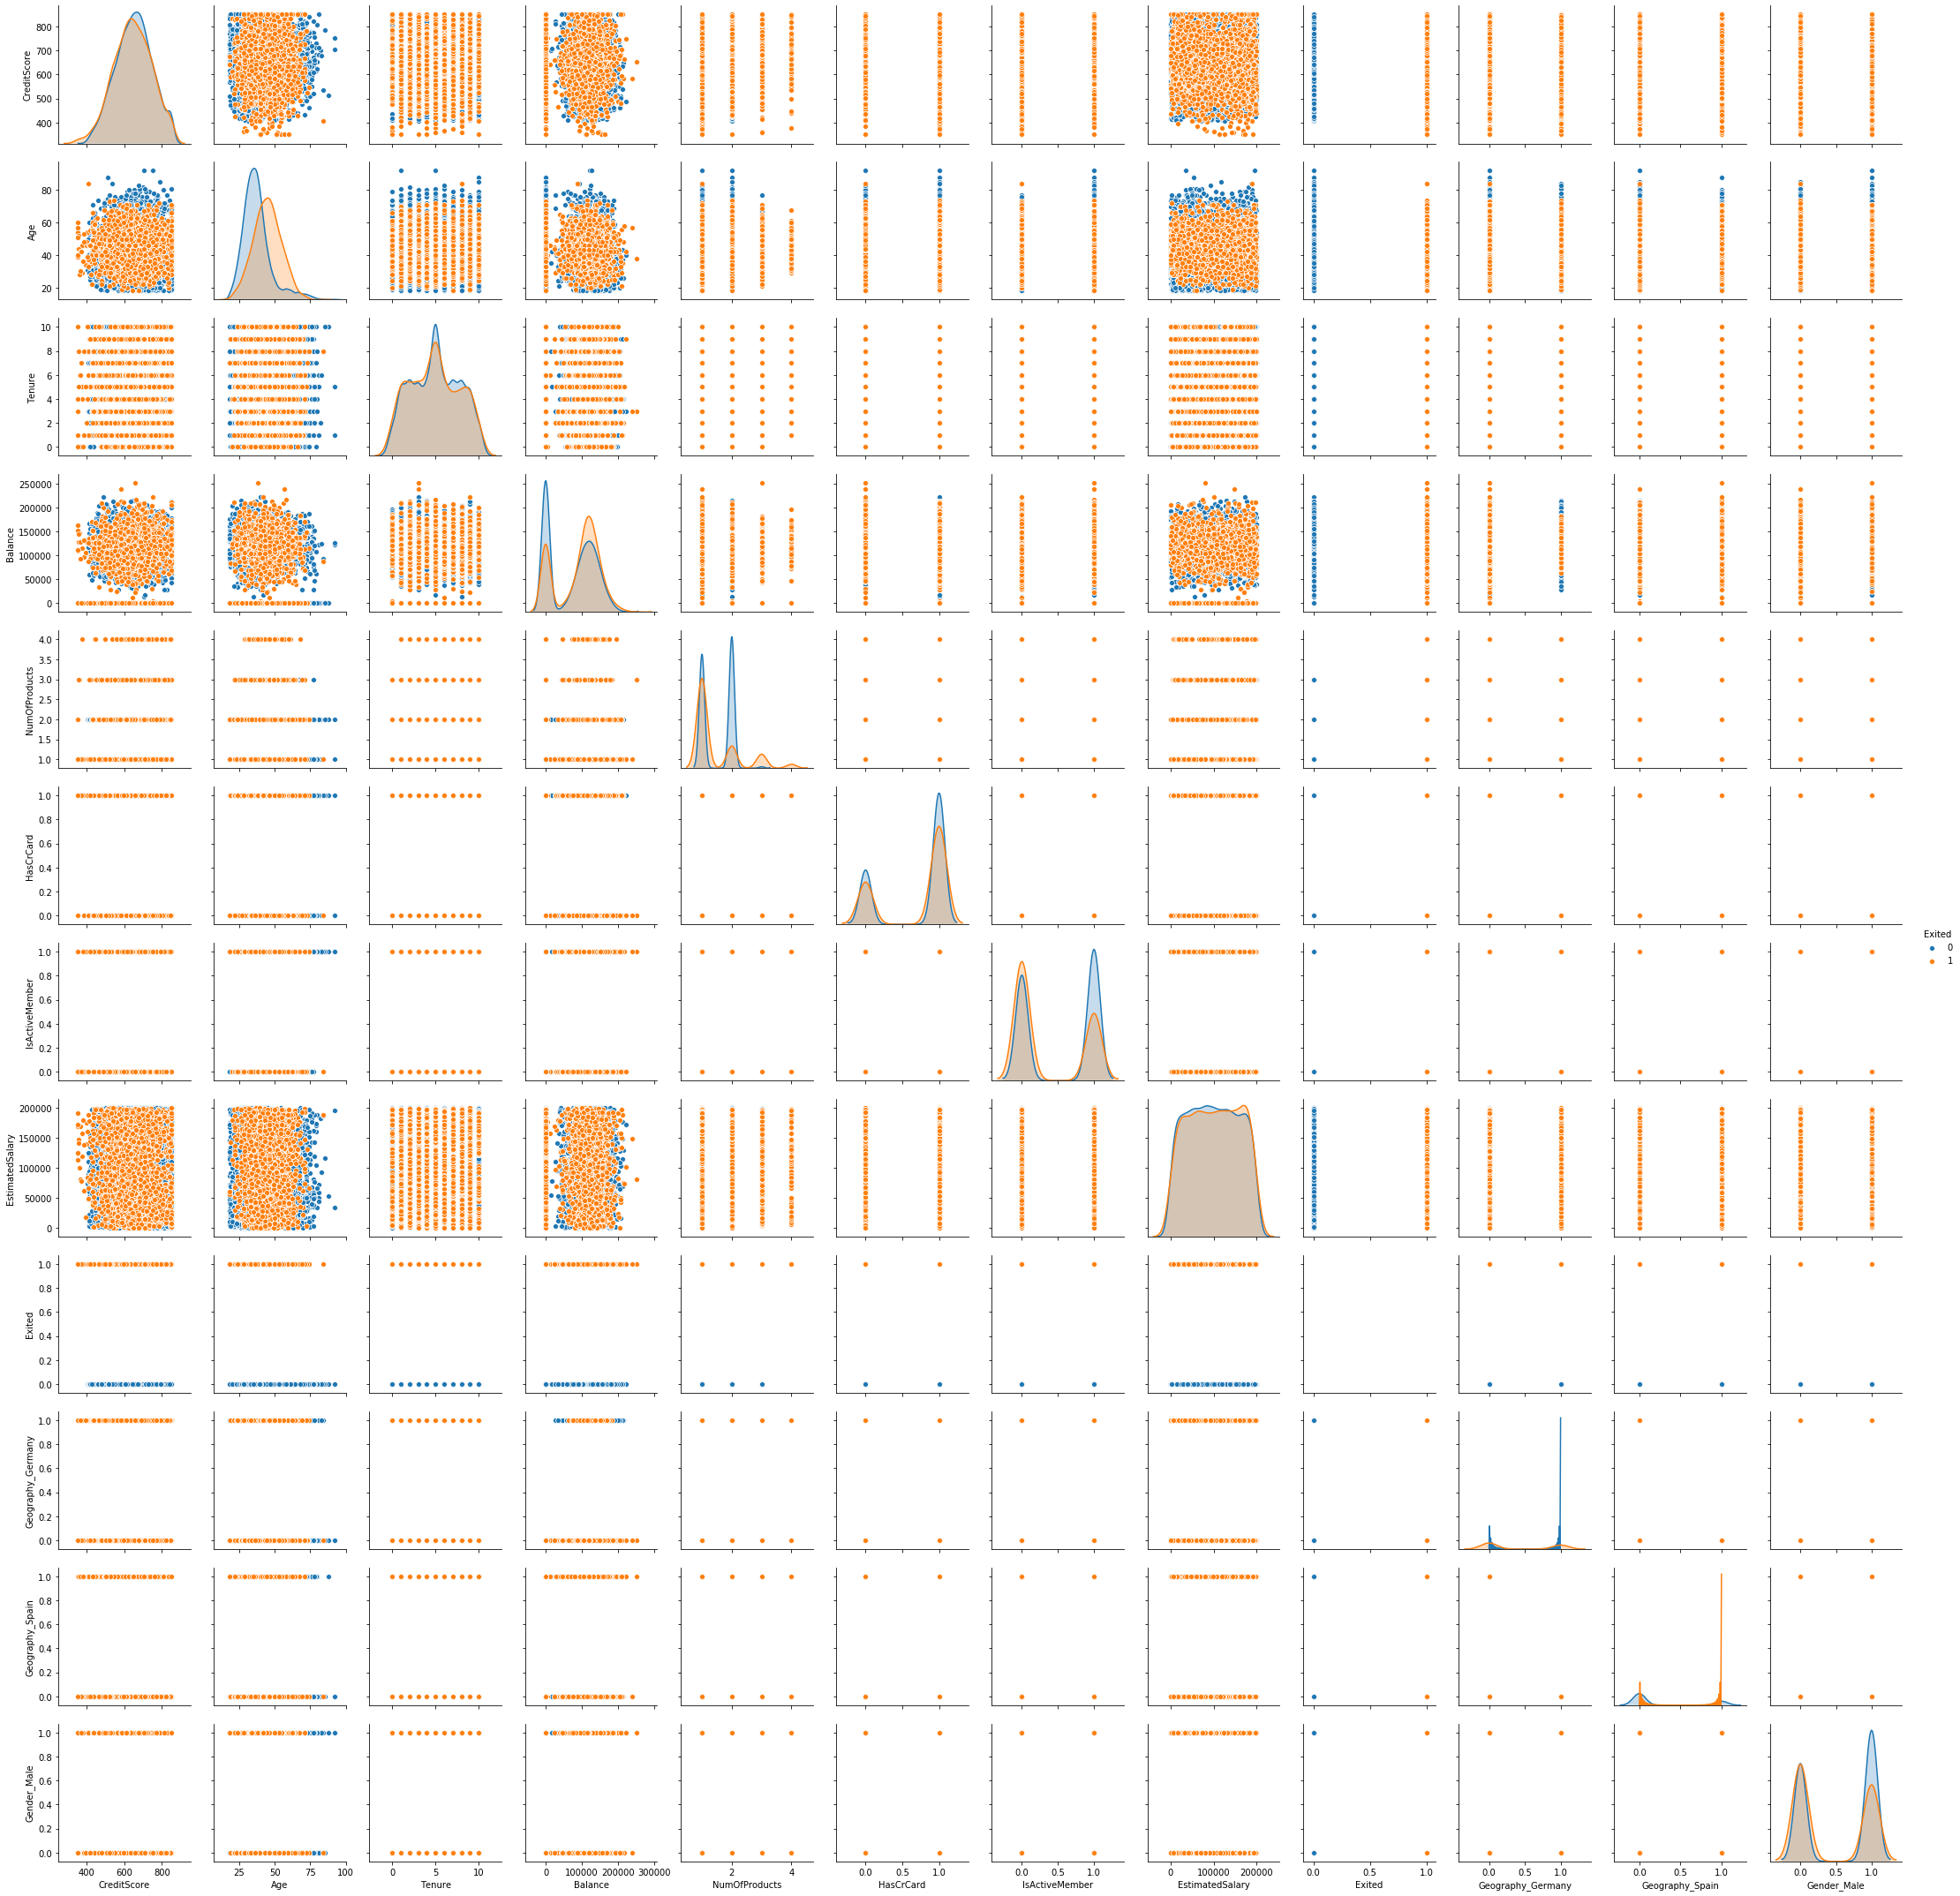

In [27]:
sns.pairplot(churn_ohe, hue="Exited");

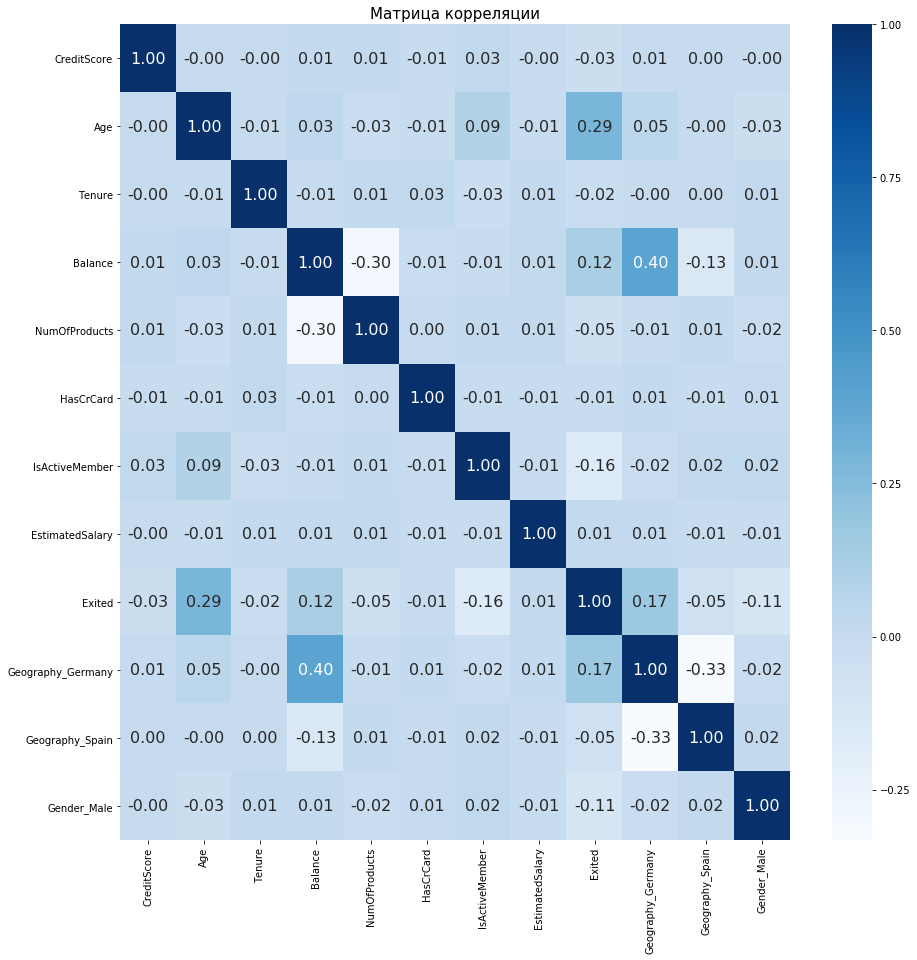

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(churn_ohe.corr(), annot=True, cmap="Blues", fmt='.2f', annot_kws={'size':16})
plt.title('Матрица корреляции', fontsize = 15);

Теперь можем убедиться, что сильной зависимости признаков друг от друга нет. Наибольшее значения коэффициента корреляции имеется у признаков "Balance" и  "Geography_Germany". Можно предположить, что имеется некоторая зависимость, что если человек из Германии, то у него много денег, или наоборот, мало. Но удалять один из признаков мы не будем, связь слишком слабая.

 **Вывод:**

На первом этапе нашем проекта мы загрузили данные, изучили их, а также выполнили предобработку и подготовку к машинному обучению. Было сделано предположение о пропусках в столбце Tenure и их заполнение. Привели данные к одному масштабу, разбили на выборки и проверили их коллинеарность.

## Исследование задачи

Рассмотрим 3 модели, которые будут выдавать предсказания:
- Решающее дерево (DecisionTreeClassifier) 
- Случайный лес (RandomForestClassifier) 
- Логистическая регрессия (LogisticRegression)



Создадим наши модели, обучим их на нужной выборке, вызовем метод predict(), чтобы предсказать ответы и посчитаем качество модели.

**Решающее дерево (DecisionTreeClassifier)**

In [28]:
best_model_tree = None
best_accuracy_tree = 0
for depth in range(1,22):
    model_tree = DecisionTreeClassifier(random_state = 12345, max_depth=depth)
    model_tree.fit(features_train,target_train)
    tree_predicted_valid = model_tree.predict(features_valid)
    accuracy_valid_tree = accuracy_score(target_valid, tree_predicted_valid)
    if accuracy_valid_tree > best_accuracy_tree:
        best_depth_tree = depth
        best_model_tree = model_tree
        best_accuracy_tree = accuracy_valid_tree
print("Глубина дерева:", best_depth_tree, end = '    ')  
print("Качество решающего дерева:", best_accuracy_tree)

Глубина дерева: 6    Качество решающего дерева: 0.858


**Случайный лес (RandomForestClassifier)**

In [29]:
best_model_forest = None
best_accuracy_forest = 0
best_est_forest = 0
best_depth_forest = 0
for est in range(1, 68, 3):
    for depth in range (1, 20):
        model_forest = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model_forest.fit(features_train, target_train)
        forest_predicted_valid = model_forest.predict(features_valid)
        accuracy_valid_forest = accuracy_score(target_valid, forest_predicted_valid)
        if accuracy_valid_forest > best_accuracy_forest:
            best_model_forest = model_forest
            best_accuracy_forest = accuracy_valid_forest
            best_est_forest = est
            best_depth_forest = depth
print("Глубина дерева:", best_depth_forest, "    Количество деревьев:", best_est_forest, "    Качество Случайного леса:", best_accuracy_forest)

Глубина дерева: 9     Количество деревьев: 10     Качество Случайного леса: 0.8665


**Логистическая регрессия (LogisticRegression)**

In [30]:
model_log = LogisticRegression(random_state=12345)
model_log.fit(features_train, target_train)
log_predicted_valid = model_log.predict(features_valid)
accuracy_valid_log = accuracy_score(target_valid, log_predicted_valid)
print("Качество Логистической регрессии:", accuracy_valid_log)

Качество Логистической регрессии: 0.803


Построим матрицы ошибок для каждой модели:

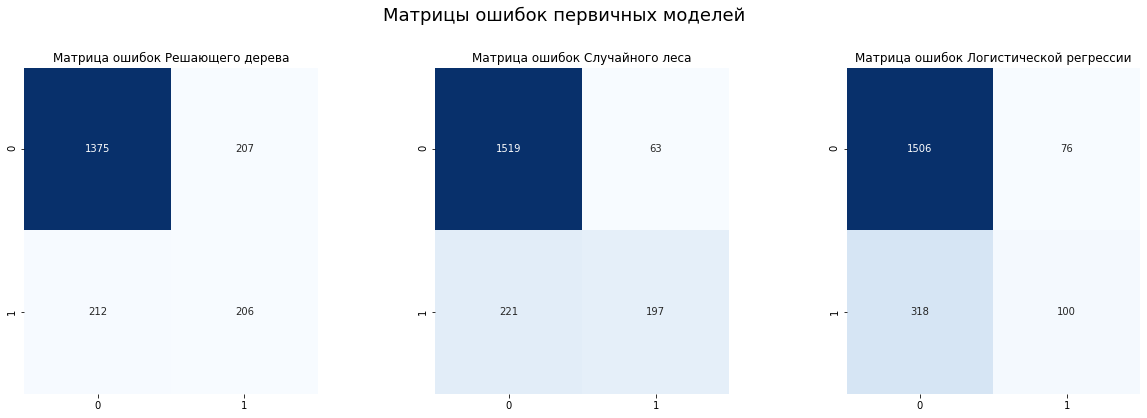

In [31]:
cm_DesTree = confusion_matrix(target_valid, tree_predicted_valid)
cm_RanFor = confusion_matrix(target_valid, forest_predicted_valid)
cm_LogReg = confusion_matrix(target_valid, log_predicted_valid)

plt.figure(figsize=(20,6))

plt.suptitle("Матрицы ошибок первичных моделей",fontsize=18,y=1.02)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("Матрица ошибок Решающего дерева")
sns.heatmap(cm_DesTree,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(1,3,2)
plt.title("Матрица ошибок Cлучайного леса")
sns.heatmap(cm_RanFor,annot=True,cmap="Blues",fmt="d",cbar=False)


plt.subplot(1,3,3)
plt.title("Матрица ошибок Логистической регрессии")
sns.heatmap(cm_LogReg,annot=True,cmap="Blues",fmt="d",cbar=False)


plt.show()


Посчитаем полноту *recall*, которая показывает долю положительных ответов, предсказанных моделью, среди всех, у которых истинная метка 1.

In [32]:
print('Полнота Решающего Дерева: {:.3f}'.format(recall_score(target_valid, tree_predicted_valid)))
print('Полнота Случайного Леса: {:.3f}'.format(recall_score(target_valid, forest_predicted_valid)))
print('Полнота Логистической регресии: {:.3f}'.format(recall_score(target_valid, log_predicted_valid)))

Полнота Решающего Дерева: 0.493
Полнота Случайного Леса: 0.471
Полнота Логистической регресии: 0.239


Посчитаем точность *precision*, которая показывает какую долю объектов, распознанных как положительные, мы предсказали верно.

In [33]:
print('Точность Решающего Дерева: {:.3f}'.format(precision_score(target_valid, tree_predicted_valid)))
print('Точность Случайного Леса: {:.3f}'.format(precision_score(target_valid, forest_predicted_valid)))
print('Точность Логистической регресии: {:.3f}'.format(precision_score(target_valid, log_predicted_valid)))

Точность Решающего Дерева: 0.499
Точность Случайного Леса: 0.758
Точность Логистической регресии: 0.568


*F1-мера* - это среднее гармоническое полноты и точности. Посчитаем её:

In [34]:
print('F1-мера Решающего Дерева: {:.3f}'.format(f1_score(target_valid, tree_predicted_valid)))
print('F1-мера Случайного Леса: {:.3f}'.format(f1_score(target_valid, forest_predicted_valid)))
print('F1-мера Логистической регресии: {:.3f}'.format(f1_score(target_valid, log_predicted_valid)))

F1-мера Решающего Дерева: 0.496
F1-мера Случайного Леса: 0.581
F1-мера Логистической регресии: 0.337


Чтобы оценить адекватность модели, cоздадим константную модель: любому объекту она прогнозирует самое частое событие (класс «0»).

In [35]:
dummy_test = DummyClassifier(strategy="most_frequent").fit(features_train, target_train)

print('Accuracy константной модели: {:.3f}'.format(dummy_test.score(features_valid, target_valid)))
print('Полнота констатной модели: {:.3}'.format(recall_score(target_valid, dummy_test.predict(features_valid))))
print('Точность констатной модели: {:.3}'.format(precision_score(target_valid, dummy_test.predict(features_valid))))
print('F1_score константной модели: {:.3}'.format(f1_score(target_valid, dummy_test.predict(features_valid))))


Accuracy константной модели: 0.791
Полнота констатной модели: 0.0
Точность констатной модели: 0.0
F1_score константной модели: 0.0


**Напишем функцию auc_roc, которая столит roc-кривую и вычисляет AUC-ROC.**

In [41]:
def auc_roc_valid(model, name):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC-кривая'.format(name))
    plt.show()
    
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('AUC-ROC равно:', auc_roc)
    return

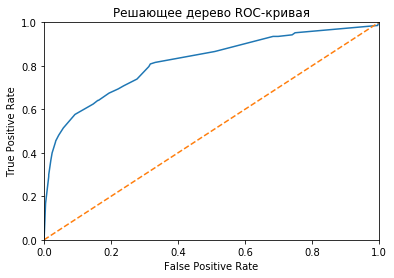

AUC-ROC равно: 0.8164631712023421


In [37]:
auc_roc_valid(best_model_tree, 'Решающее дерево')

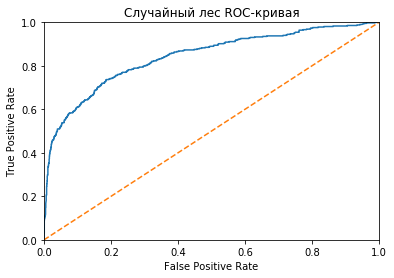

AUC-ROC равно: 0.8418504527610258


In [38]:
auc_roc_valid(best_model_forest, 'Случайный лес')

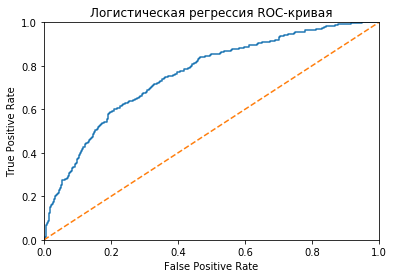

AUC-ROC равно: 0.7586454067590536


In [39]:
auc_roc_valid(model_log, 'Логистическая регрессия')

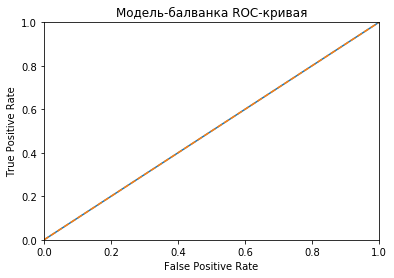

AUC-ROC равно: 0.5


In [40]:
auc_roc_valid(dummy_test, 'Модель-балванка')

**Вывод**

На данном этапе был произведен анализ работы трех типов моделей (а также "модели-балванки") с дисбалансом классов в обучающей выборке. В ходе исследования были получены следующие результаты:

Показатель accuracy:
- Решающее дерево: ~ 0.858
- Случайный лес: ~ 0.866
- Логистическая регрессия: ~ 0.8025
- Константная модель: ~ 0.791

F1-мера моделей:
- Решающее дерево: ~ 0.496
- Случайный лес: ~ 0.588
- Логистическая регрессия: ~ 0.334
- Константная модель: 0

По результатам можно сделать вывод, пока что модели далеки от идеала, и предсказывают немного лучше, чем константная модель. Используя новые метрики оценки модели: recall, precision и f1 мы увидели все тонкости. В совокупности, модели не могут объективно предсказывать выход клиента из банковского обслуживания.

## Борьба с дисбалансом

В данном пункте мы будем бороться с дисбалансом в нашей выборке 3-мя способами

### Придадим объектам редкого класса больший вес, это реализуется с помощью *class_weight*.
Обучим модели используя этот параметр и найдем F1-меры.

In [29]:
model_log = LogisticRegression(random_state = 12345, class_weight = 'balanced', solver = 'liblinear')
model_log.fit(features_train, target_train)
log_predicted_valid = model_log.predict(features_valid)

model_tree = DecisionTreeClassifier(random_state = 12345, class_weight = 'balanced', max_depth = 6)
model_tree.fit(features_train, target_train)
tree_predicted_valid = model_tree.predict(features_valid)

model_forest = RandomForestClassifier(random_state = 12345, class_weight = 'balanced', n_estimators = 43, max_depth = 12)
model_forest.fit(features_train, target_train)
forest_predicted_valid = model_forest.predict(features_valid)

In [30]:
print("С учетом баланса классов:")
print('F1-мера Логистической регресии:{:.2f}'.format(f1_score(target_valid, log_predicted_valid)))
print('F1-мера Решающего Дерева:{:.2f}'.format(f1_score(target_valid, tree_predicted_valid)))
print('F1-мера Случайного Леса:{:.2f}'.format(f1_score(target_valid, forest_predicted_valid)))

С учетом баланса классов:
F1-мера Логистической регресии:0.49
F1-мера Решающего Дерева:0.56
F1-мера Случайного Леса:0.60


### Увеличение выборки *upsampling*. 
Разделим обучающую выборку на отрицательные и положительные объекты и напишем функцию для создания новой выборки. Сделаем наши классы равными по количеству, увеличив положительный в 4 раза.

In [31]:
def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 11)
(9588,)


Теперь обучим модели на полученной выборке

In [32]:
model_log = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_log.fit(features_upsampled, target_upsampled)
log_predicted_valid = model_log.predict(features_valid)

model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = 6)
model_tree.fit(features_upsampled, target_upsampled)
tree_predicted_valid = model_tree.predict(features_valid)

model_forest = RandomForestClassifier(random_state = 12345, n_estimators = 43, max_depth = 12)
model_forest.fit(features_upsampled, target_upsampled)
forest_predicted_valid = model_forest.predict(features_valid)

In [33]:
print("С учетом увеличения выборки (upsampling):")
print('F1-мера Логистической регресии:{:.2f}'.format(f1_score(target_valid, log_predicted_valid)))
print('F1-мера Решающего Дерева:{:.2f}'.format(f1_score(target_valid, tree_predicted_valid)))
print('F1-мера Случайного Леса:{:.2f}'.format(f1_score(target_valid, forest_predicted_valid)))

С учетом увеличения выборки (upsampling):
F1-мера Логистической регресии:0.49
F1-мера Решающего Дерева:0.56
F1-мера Случайного Леса:0.61


### Уменьшение выборки downsampling
Разделим обучающую выборку на отрицательные и положительные объекты и напишем функцию для создания новой выборки. Сделаем наши классы равными по количеству, отбросив от большего класса случайным образом нужное количество данных.

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] +
                                     [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] +
                                     [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled,
                                                      random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [35]:
model_log = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_log.fit(features_downsampled, target_downsampled)
log_predicted_valid = model_log.predict(features_valid)

model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = 6)
model_tree.fit(features_downsampled, target_downsampled)
tree_predicted_valid = model_tree.predict(features_valid)

model_forest = RandomForestClassifier(random_state = 12345, n_estimators = 43, max_depth = 12)
model_forest.fit(features_downsampled, target_downsampled)
forest_predicted_valid = model_forest.predict(features_valid)

In [36]:
print("С учетом уменьшения выборки (downsampling):")
print('F1-мера Логистической регресии:{:.2f}'.format(f1_score(target_valid, log_predicted_valid)))
print('F1-мера Решающего Дерева:{:.2f}'.format(f1_score(target_valid, tree_predicted_valid)))
print('F1-мера Случайного Леса:{:.2f}'.format(f1_score(target_valid, forest_predicted_valid)))

С учетом уменьшения выборки (downsampling):
F1-мера Логистической регресии:0.48
F1-мера Решающего Дерева:0.57
F1-мера Случайного Леса:0.58


Лучшие результаты показывает функция upsampling, поэтому будем обучать модели с помощью неё:

In [37]:
#Логистическая регрессия
model_log = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_log.fit(features_upsampled, target_upsampled)

#Решающее дерево
model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = 6)
model_tree.fit(features_upsampled, target_upsampled)

#Случайный лес
model_forest = RandomForestClassifier(random_state = 12345, n_estimators = 43, max_depth = 12)
model_forest.fit(features_upsampled, target_upsampled);


### Построим графики AUC_ROC для наших моделей

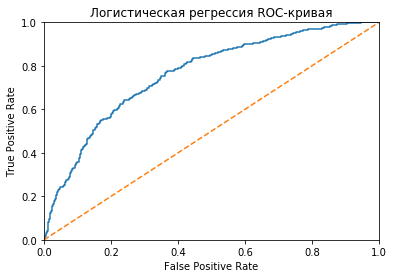

AUC-ROC равно: 0.7636478565682107


In [42]:
auc_roc_valid(model_log, 'Логистическая регрессия')

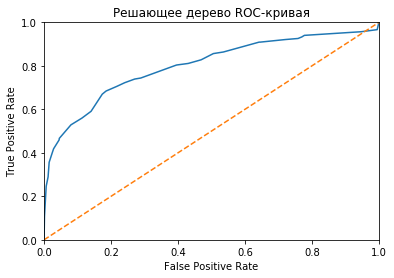

AUC-ROC равно: 0.7999473744699641


In [43]:
auc_roc_valid(model_tree, 'Решающее дерево')

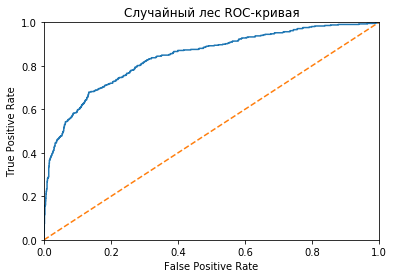

AUC-ROC равно: 0.8413211730049177


In [44]:
auc_roc_valid(model_forest, 'Случайный лес')

**Вывод:**
На данном этапе проетка мы провели работу по устранению дисбаланса классов в датасете. Бали применены три способа, лучшим оказался метод увеличения выборки (upsampling). Обучив модели на новой выборке, построили ROC-кривые и посчитали их AUC-ROC характеристику. 

## Тестирование модели

Проверим наши модели на тестовой выборке: Для начала подготовим новые данные для обучения

In [45]:
features_temp_upsampled, target_temp_upsampled = upsample(features_temp, target_temp, 4)
print(features_temp_upsampled.shape)
print(target_temp_upsampled.shape)

(12842, 11)
(12842,)


Заново обучим наши модели на новой выборке и подберем лучшие параметры:

In [56]:
#Логистическая регрессия
model_log = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_log.fit(features_temp_upsampled, target_temp_upsampled)
log_predicted_test = model_log.predict(features_test)
print('F1-мера Логистической регрессии:', f1_score(target_test, log_predicted_test))


F1-мера Логистической регрессии: 0.48406546080964685


In [55]:
#Решающее дерево
best_model_tree = None
best_f1_tree = 0
for depth in range(1,22):
    model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model_tree.fit(features_temp_upsampled, target_temp_upsampled)
    tree_predicted_test = model_tree.predict(features_test)
    f1_tree = f1_score(target_test, tree_predicted_test)
    if f1_tree > best_f1_tree:
        best_depth_tree = depth
        best_model_tree = model_tree
        best_f1_tree = f1_tree
        tree_pt = tree_predicted_test 
print("Глубина дерева:", best_depth_tree, end = '    ')  
print("F1_мера Решающего дерева:", best_f1_tree)        

Глубина дерева: 8    F1_мера Решающего дерева: 0.5897693079237714


In [48]:
#Случайный лес
best_model_forest = None
best_f1_forest = 0
best_est_forest = 0
best_depth_forest = 0
for est in range(1, 68, 3):
    for depth in range (1, 20):
        model_forest = RandomForestClassifier(random_state = 12345, n_estimators = est, max_depth = depth)
        model_forest.fit(features_temp_upsampled, target_temp_upsampled)
        forest_predicted_test = model_forest.predict(features_test)
        f1_forest = f1_score(target_test, forest_predicted_test)
        if f1_forest > best_f1_forest:
            best_depth_forest = depth
            best_model_forest = model_forest
            best_f1_forest = f1_forest
            best_est_forest = est
            forest_pt = forest_predicted_test 
print("Глубина дерева:", best_depth_forest, "    Количество деревьев:", best_est_forest, "       F1_мера Случайного леса:", best_f1_forest)           

Глубина дерева: 12     Количество деревьев: 16        F1_мера Случайного леса: 0.6275395033860044


## Анализ важности признаков

In [49]:
importances = best_model_forest.feature_importances_
feature_list = list(features_temp_upsampled.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results.head(10)

,feature,importance
0,Age,0.304122
1,NumOfProducts,0.169364
2,Balance,0.127991
3,EstimatedSalary,0.103723
4,CreditScore,0.102109
5,Tenure,0.056220
6,IsActiveMember,0.050110
7,Geography_Germany,0.040311
8,Gender_Male,0.024272
9,HasCrCard,0.012237


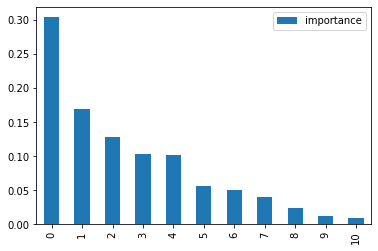

In [50]:
feature_results.plot(kind = 'bar',);

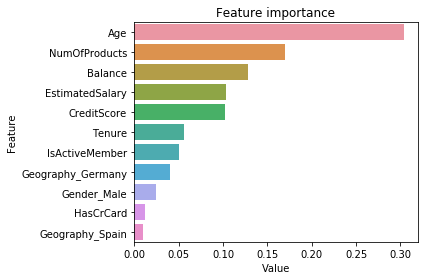

In [53]:
feature_importance = best_model_forest.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, feature_list)), columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature importance')
plt.tight_layout()
plt.show();

Посчитаем не менее выжные метрики, полноту и точность:

In [57]:
print('Полнота Решающего Дерева: {:.3f}'.format(recall_score(target_test, tree_pt)))
print('Полнота Случайного Леса: {:.3f}'.format(recall_score(target_test, forest_pt)))
print('Полнота Логистической регресии: {:.3f}'.format(recall_score(target_test, log_predicted_test)))

Полнота Решающего Дерева: 0.695
Полнота Случайного Леса: 0.657
Полнота Логистической регресии: 0.664


In [58]:
print('Точность Решающего Дерева: {:.3f}'.format(precision_score(target_test, tree_pt)))
print('Точность Случайного Леса: {:.3f}'.format(precision_score(target_test, forest_pt)))
print('Точность Логистической регресии: {:.3f}'.format(precision_score(target_test, log_predicted_test)))

Точность Решающего Дерева: 0.512
Точность Случайного Леса: 0.600
Точность Логистической регресии: 0.381


In [59]:
print('Точность Решающего Дерева: {:.3f}'.format(f1_score(target_test, tree_pt)))
print('Точность Случайного Леса: {:.3f}'.format(f1_score(target_test, forest_pt)))
print('Точность Логистической регресии: {:.3f}'.format(f1_score(target_test, log_predicted_test)))

Точность Решающего Дерева: 0.590
Точность Случайного Леса: 0.628
Точность Логистической регресии: 0.484


Напишем новую функцию AUC_ROC, у которой прогнозы будут по тестовой выборке

In [64]:
def auc_roc_test(model, name):
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC-кривая'.format(name))
    plt.show()
    
    auc_roc = roc_auc_score(target_test, probabilities_one_test)
    print('AUC-ROC равно:', auc_roc)
    return

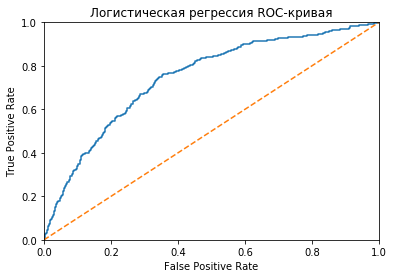

AUC-ROC равно: 0.7441741583729469


In [65]:
auc_roc_test(model_log, 'Логистическая регрессия')

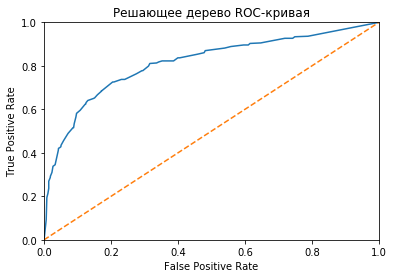

AUC-ROC равно: 0.8131870520529298


In [66]:
auc_roc_test(best_model_tree, 'Решающее дерево')

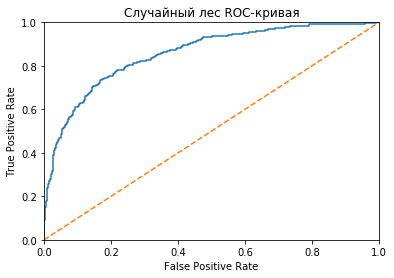

AUC-ROC равно: 0.8570706866285598


In [67]:
auc_roc_test(best_model_forest, 'Случайный лес')

**Вывод:**

По итогам тестирования модель Случайный лес показала самые лучшие показатели F1-меры и AUC-ROC.

# Общий вывод

В ходе данной работы были проведены анализ и подготовка данных, их предобработка. Затем датасет разбили на выборки для машинного обучения. На этапе исследовальской работы мы обучали три вида моделей без учета дисбаланса классов, а затем, применив к данным разные техники балансировки классов, обучили модели и нашли наилучший способ. Также изучили метрики F1-меры и AUC-ROC. Применив лучший метод балансировки, мы обучили модели на более крупной выборке и провели финальное тестирование. Наилучшие результаты показала модель "Случайный лес", котоорая показала F1-меру равную 0.629 и AUC-ROC равный 0.857.